# 0. Import Library

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats

![](https://onlinelibrary.wiley.com/cms/asset/ea1d3bd8-afd7-4914-b645-74d424b6690d/advs3654-fig-0002-m.jpg)

# 1. Input Data

In [9]:
#อ่านไฟล์ diabetes.csv
df = pd.read_csv('data/diabetes.csv')

# 2. Data Preprocessing

## 2.1 Exploratory Data Analysis (EDA)

In [10]:
#สำรวจข้อมูลเบื้องต้นโดย
#- 1. สำรวจตัวอย่างของข้อมูลโดยใช้ head() / tail() / sample()
#- 2. ตรวจสอบขนาดของ DataFrame โดยใช้ shape
#- 3. ตรวจสอบค่าทางสถิติต่างๆ โดยใช้ describe()
#- 4. ตรวจสอบชนิดข้อมูลของทุกคอลัมน์ โดยใช้ dtypes
print(df.head())
print("*"*50)
print(df.shape)
print("*"*50)
print(df.describe())
print("*"*50)
print(df.dtypes)
print("*"*50)
print(df.isnull().sum())

  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0           6      148             72             35        0  33.6   
1           1       85             66             29        0  26.6   
2           8      183             64              0        0  23.3   
3           1       89             66             23       94  28.1   
4          no      137              4             35      168  43.1   

   DiabetesPedigreeFunction  Age       Outcome  
0                     0.627    5      diabetic  
1                     0.351   31  non-diabetic  
2                     0.672   32      diabetic  
3                     0.167   21  non-diabetic  
4                     2.288   33      diabetic  
**************************************************
(768, 9)
**************************************************
          Glucose  BloodPressure  SkinThickness       Insulin         BMI  \
count  768.000000     768.000000     768.000000    768.000000  757.000000   
mean    98.664

## 2.2 Data Cleaning

In [11]:
#ทำความสะอาดข้อมูล
#- 1. Missing Value
df['BMI']=df['BMI'].fillna(df['BMI'].mean())
#- 1.1 ทำการตรวจสอบโดยใช้ isnull().any() หรือ isnull().sum()
print(df.isnull().sum())
#- 1.2 ถ้าพบว่ามีข้อมูลสูญหาย ให้ทำการเลือกวิธีการแก้ปัญหาสำหรับข้อมูลที่หายไป เช่น การหาค่ามาแทนที่ หรือ การลบข้อมูลที่มีปัญหาออกไป
#- 2. Inconsistent Data 
#- 2.1 ทำการตรวจสอบ Inconsistent Data โดยใช้ df.groupby('........')['........'].count()
#- 2.2 ถ้าพบว่ามี Inconsistent Data ให้ทำการแก้ไขโดยใช้ฟังก์ชัน to_numeric แล้วหาค่ามาแทนที่
#- 3. Outlier ตรวจสอบ เฉพาะ Insulin

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### - Missing Value

### - Inconsistent Data

### - Outliers

## 2.3 Data Transformation

In [15]:
#ทำ Data Transformation โดยใช้ LabelEncoder
def labelEncode(data, columns):
    columns_ = []
    for i in columns:
        lb = LabelEncoder()
        lb_ = lb.fit_transform(data[i].astype(str))
        data[i+'_Encoded']=lb_
        columns_.append(i+'_Encoded')
    return columns_,lb

columns = ['Outcome']
enc_columns, lb=labelEncode(df, columns)

print (df.sample(15))

for i in enc_columns:
    print(i[:-8])
    print(' ',df[i[:-8]].unique())
    print(' ',df[i].unique())
    print('--'*15)

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin        BMI  \
591           2      112             78              5       14  39.400000   
642           6      147              8              0        0  29.500000   
426          no       94              0              0        0  29.865654   
285           7      136             74             26      135  26.000000   
42            7       16             92             18        0  22.700000   
205           5      111             72             28        0  23.900000   
199           4      148              6             27      318   3.900000   
116           5      124             74              0        0  34.000000   
589          no       73              0              0        0  21.100000   
7             1      115              0              0        0  35.300000   
601           6       96              0              0        0  23.700000   
291          no       17             62              3       74 

## [Optional] Export เป็นไฟล์เมื่อทำ Data Cleaning เสร็จแล้ว

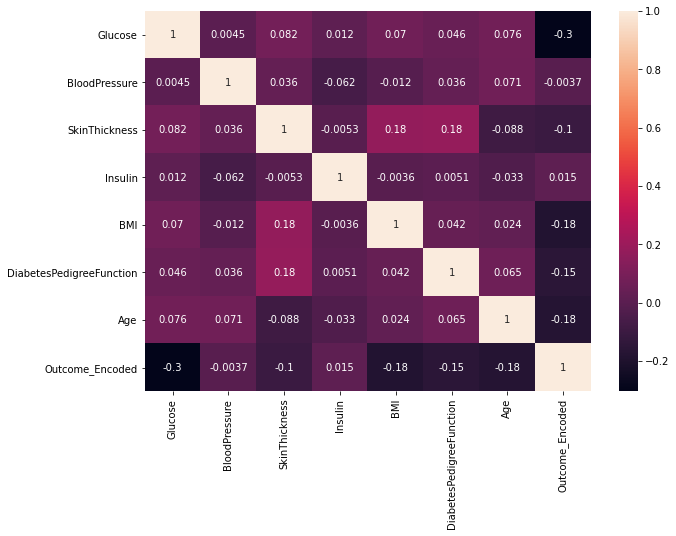

In [17]:
plt.rcParams['figure.figsize'] = 10,7 
sns.heatmap(df.corr(), annot=True);

## 2.4 ตรวจสอบค่าสหสัมพันธ์ของตัวแปร x, y

In [ ]:
#ดูค่าสหสัมพันธ์ของข้อมูล

## 2.5 การกำหนด Feature / Target

In [ ]:
#แยกเป็นตัวแปรที่เป็นข้อมูล feature (X) และ คำตอบ target (Y)
#feature คือ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction','Age'
#target คือ Outcome
DataMatrix = df.values
DataMatrix.shape


## 2.6 Data Preparation (แบ่งข้อมูลสำหรับ Training / Testing)

In [ ]:
#แบ่งข้อมูลสำหรับ Testing 40% และที่เหลือเอาไว้ใช้สำหรับ Training

# 3. Modelling: Naive Bayes

In [ ]:
#- Training Process
#1. เทรนข้อมูลและสร้างโมเดล
#2. วัดคะแนนของโมเดลโดยใช้ score()
#- Testing Process
#1. นำโมเดลที่สร้างมาทำการพยากรณ์ข้อมูลสำหรับการทดสอบโดยใช้ predict()

## 3.1 Training Process

## 3.2 Testing Process

# 4. Model Evaluation

In [ ]:
#ประเมินประสิทธิภาพของโมเดล
# 1. สำหรับ Split Test ใช้ confusion matrix และแสดง accuracy, precision, recall, f1-score
# 2. ประเมินผลโมเดลโดยใช้ Cross Validation Test 

## 4.1 Split Test

## 4.2 Cross Validation Test

# [Optional] Save Machine Learning Models

In [ ]:
#Save เป็นชื่อรหัสนักศึกษา.sav โดยใช้ joblib หรือ pickle